In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [6]:
insurance_claim=pd.read_csv("insurance_claims.csv")
insurance_claim.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [10]:
insurance_claim.describe()


months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [12]:
insurance_claim.dtypes


months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [16]:
insurance_claim=insurance_claim.replace("?",np.NaN)


In [18]:
round(100*(insurance_claim.isnull().sum()/len(insurance_claim.index)),2)


months_as_customer               0.0
age                              0.0
policy_number                    0.0
policy_bind_date                 0.0
policy_state                     0.0
policy_csl                       0.0
policy_deductable                0.0
policy_annual_premium            0.0
umbrella_limit                   0.0
insured_zip                      0.0
insured_sex                      0.0
insured_education_level          0.0
insured_occupation               0.0
insured_hobbies                  0.0
insured_relationship             0.0
capital-gains                    0.0
capital-loss                     0.0
incident_date                    0.0
incident_type                    0.0
collision_type                  17.8
incident_severity                0.0
authorities_contacted            9.1
incident_state                   0.0
incident_city                    0.0
incident_location                0.0
incident_hour_of_the_day         0.0
number_of_vehicles_involved      0.0
p

In [20]:
### Checking unique values for collosion type

round(100*(insurance_claim['collision_type'].value_counts(normalize=True,dropna=False)),2)

collision_type
Rear Collision     29.2
Side Collision     27.6
Front Collision    25.4
NaN                17.8
Name: proportion, dtype: float64

In [22]:
### We can impute collosion type with mode i.e most occuring collosion type
### imputing

insurance_claim['collision_type']=insurance_claim['collision_type'].fillna(insurance_claim['collision_type'].mode()[0])

In [24]:
### Checking unique values for collosion type

round(100*(insurance_claim['property_damage'].value_counts(normalize=True,dropna=False)),2)

property_damage
NaN    36.0
NO     33.8
YES    30.2
Name: proportion, dtype: float64

In [26]:
### If there was property loss,then the report would have been filed.So,we can consider missing value as "NO"
###Imputing with "NO"

insurance_claim['property_damage']=insurance_claim['property_damage'].fillna("NO")

In [28]:
### Checking unique values for collosion type

round(100*(insurance_claim['police_report_available'].value_counts(normalize=True,dropna=False)),2)

police_report_available
NaN    34.3
NO     34.3
YES    31.4
Name: proportion, dtype: float64

In [30]:
### If there was police reported,then the report would have been filed.So,we can consider missing value as "NO"
###Imputing with "NO"

insurance_claim['police_report_available']=insurance_claim['property_damage'].fillna("NO")


In [32]:
### Checking missing value again

round(100*(insurance_claim.isnull().sum()/len(insurance_claim.index)),2)

months_as_customer               0.0
age                              0.0
policy_number                    0.0
policy_bind_date                 0.0
policy_state                     0.0
policy_csl                       0.0
policy_deductable                0.0
policy_annual_premium            0.0
umbrella_limit                   0.0
insured_zip                      0.0
insured_sex                      0.0
insured_education_level          0.0
insured_occupation               0.0
insured_hobbies                  0.0
insured_relationship             0.0
capital-gains                    0.0
capital-loss                     0.0
incident_date                    0.0
incident_type                    0.0
collision_type                   0.0
incident_severity                0.0
authorities_contacted            9.1
incident_state                   0.0
incident_city                    0.0
incident_location                0.0
incident_hour_of_the_day         0.0
number_of_vehicles_involved      0.0
p

In [34]:
### Dropping those column which are not much sighnificance in oir analysis

insurance_claim.drop(["incident_hour_of_the_day",'insured_zip','policy_bind_date','incident_location'],axis=1,inplace=True)

In [36]:
### Checking values for each column

insurance_claim.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries                   3
witnesses                         4
police_report_available           2
total_claim_amount          

In [38]:
### Total claim must be equal to sum of "injury_claim","property_claim","vehicle_claim"

insurance_claim[insurance_claim['total_claim_amount'] != insurance_claim['injury_claim']+insurance_claim['property_claim']+insurance_claim['vehicle_claim']].shape[0]

0

In [40]:
### Others sanity check

print(insurance_claim[insurance_claim['months_as_customer']<0].shape[0])
print(insurance_claim[insurance_claim['age']<0].shape[0])
print(insurance_claim[insurance_claim['policy_annual_premium']<0].shape[0])
print(insurance_claim[insurance_claim['total_claim_amount']<0].shape[0])
print(insurance_claim[insurance_claim['umbrella_limit']<0].shape[0])
print(insurance_claim[insurance_claim['capital-gains']<0].shape[0])
print(insurance_claim[insurance_claim['number_of_vehicles_involved']<0].shape[0])
print(insurance_claim[insurance_claim['injury_claim']<0].shape[0])
print(insurance_claim[insurance_claim['property_claim']<0].shape[0])
print(insurance_claim[insurance_claim['vehicle_claim']<0].shape[0])

0
0
0
0
1
0
0
0
0
0


In [42]:
### Fetching that row

insurance_claim[insurance_claim['umbrella_limit']<0]

months_as_customer  age  policy_number policy_state policy_csl  \
290                 284   42         526039           OH    100/300   

     policy_deductable  policy_annual_premium  umbrella_limit insured_sex  \
290                500                1338.54        -1000000        MALE   

    insured_education_level  ... police_report_available total_claim_amount  \
290               Associate  ...                     YES              94160   

    injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
290         8560           17120          68480  Chevrolet     Malibu   

    auto_year fraud_reported _c39  
290      1996              N  NaN  

[1 rows x 36 columns]

In [44]:
### dropping above row

insurance_claim.drop(insurance_claim.index[290],inplace=True)

In [46]:
### changing Incident date into datetime format
insurance_claim['incident_date']=pd.to_datetime(insurance_claim['incident_date'],format='%Y-%m-%d')

### changing auto_year date into datetime format
insurance_claim['auto_year']=pd.to_datetime(insurance_claim['auto_year'],format='%Y')

In [48]:
### Checking datatypes again
insurance_claim.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                     

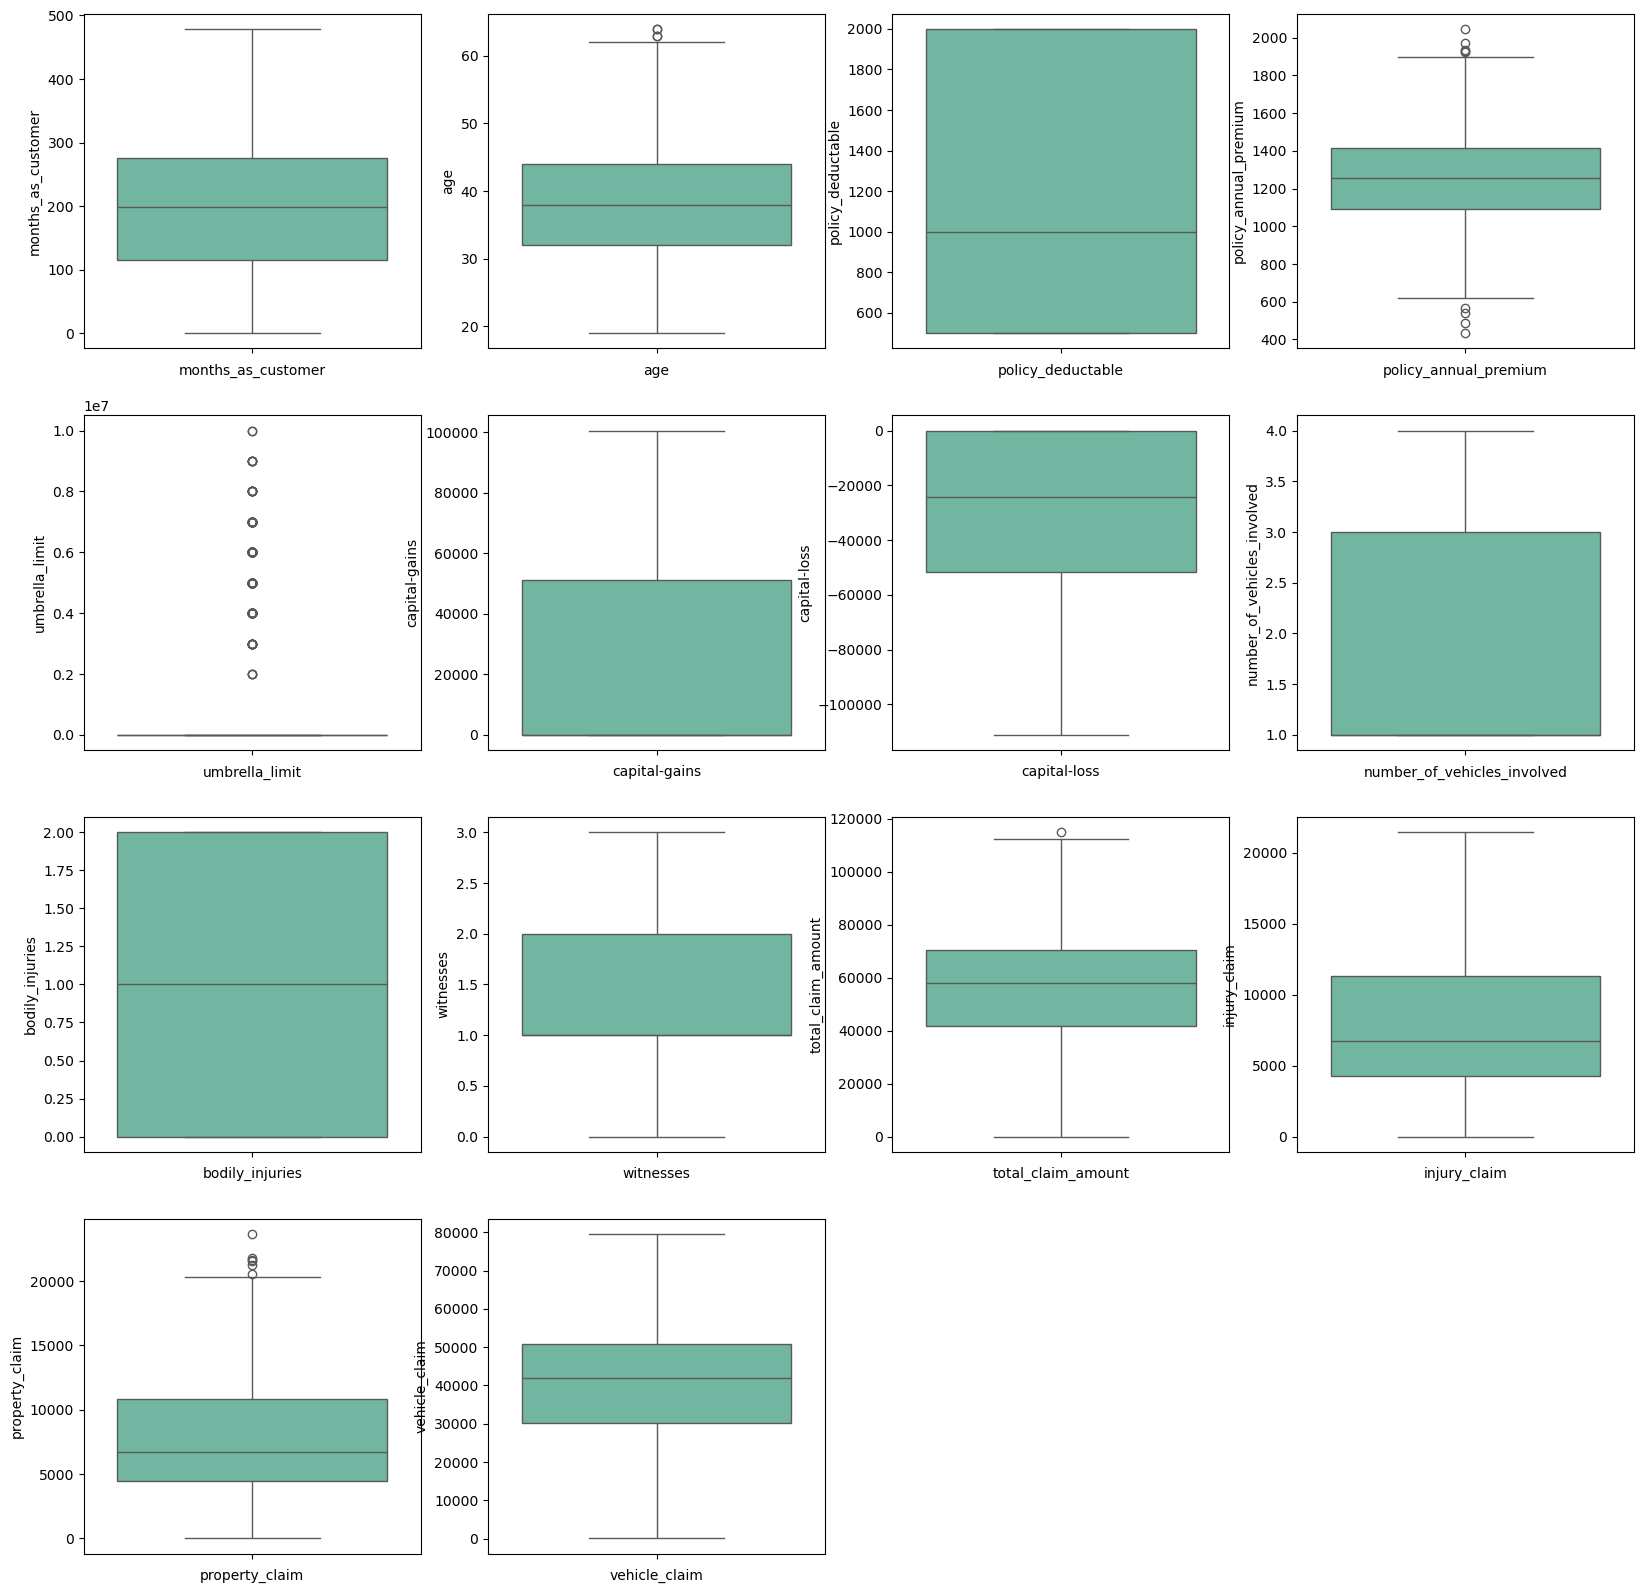

In [50]:
#outlier
plt.figure(figsize=[20,20])


num_col= ['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim']

c=1

for i in num_col:
    plt.subplot(4, 4, c)
    plt.xlabel(i)
    sns.boxplot(insurance_claim[i] , palette="Set2")
    c = c + 1
    
plt.show()

In [51]:
insurance_claim['count']=1


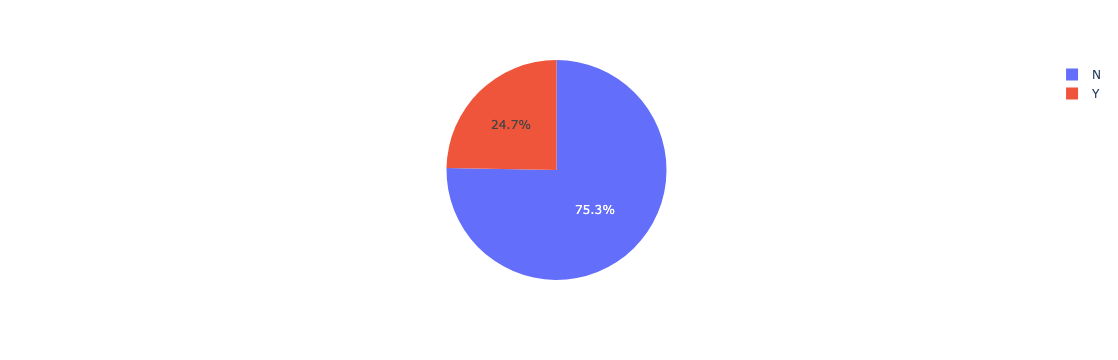

In [54]:
#EDA
#plt.figure(figsize=[5,4])
fig = px.pie(insurance_claim,names='fraud_reported')
fig.show()


In [56]:
### Datasplitting into fraud and not fraud category

insurance_claim_f=insurance_claim[insurance_claim['fraud_reported']=='Y']
insurance_claim_nf=insurance_claim[insurance_claim['fraud_reported']=='N']

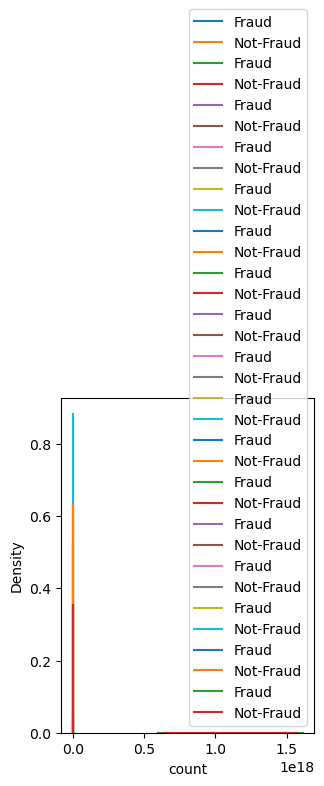

In [58]:
plt.figure(figsize=[15,20])
num_col=insurance_claim.describe().columns.to_list()

c=1

for i in num_col:
    plt.subplot(4, 4, 4)
    sns.distplot(insurance_claim_f[i],hist=False,label='Fraud')
    sns.distplot(insurance_claim_nf[i],hist=False,label='Not-Fraud')
    c = c + 1
    plt.legend()    
plt.show()

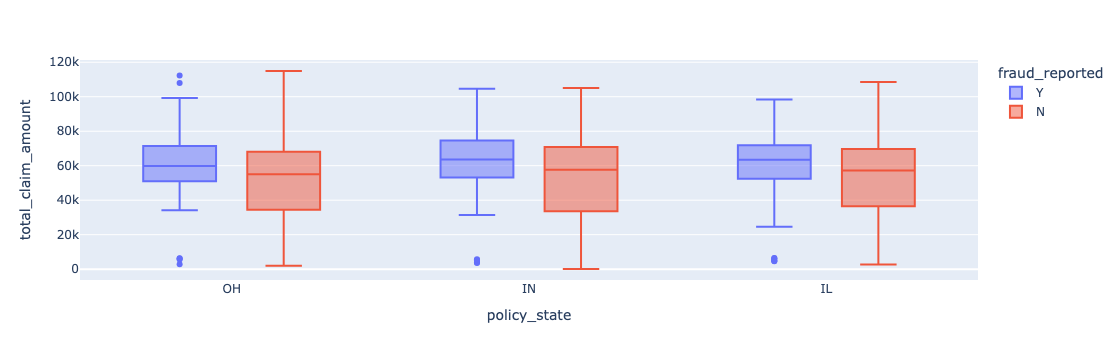

In [60]:
fig = px.box(insurance_claim, x="policy_state", y="total_claim_amount", color="fraud_reported")
fig.show()

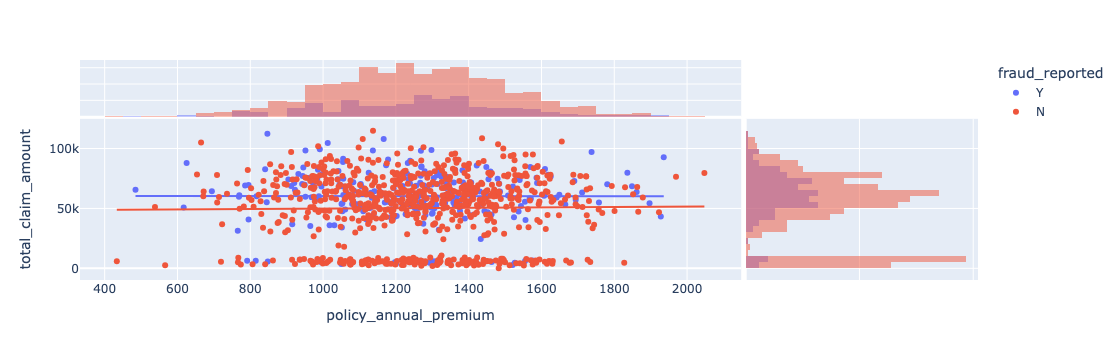

In [62]:
fig=px.scatter(insurance_claim,x='policy_annual_premium',y='total_claim_amount',color='fraud_reported',marginal_x='histogram',marginal_y='histogram',trendline='ols')
fig.show()

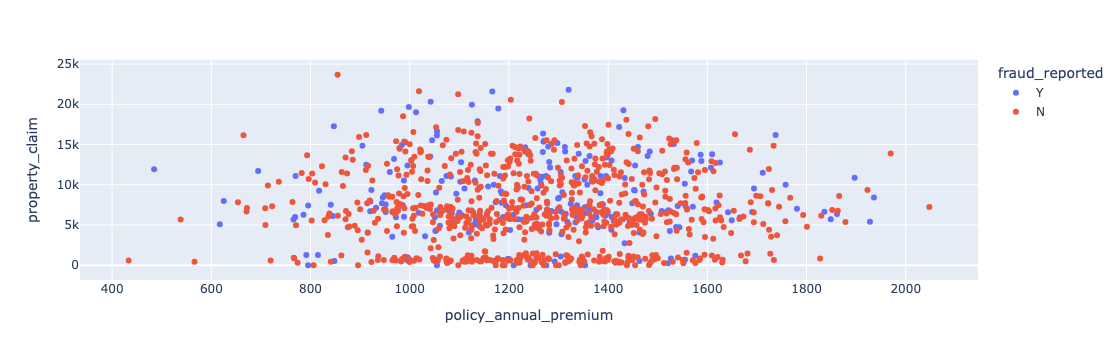

In [63]:
fig=px.scatter(insurance_claim,x='policy_annual_premium',y='property_claim',color='fraud_reported')
fig.show()

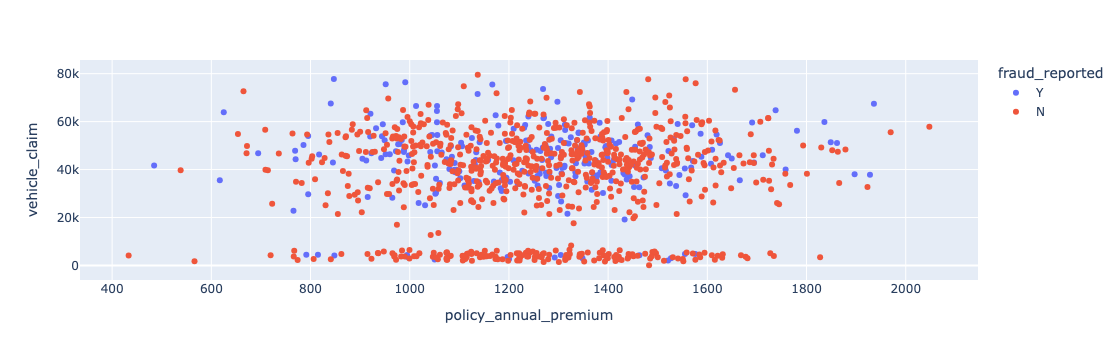

In [66]:
fig=px.scatter(insurance_claim,x='policy_annual_premium',y='vehicle_claim',color='fraud_reported')
fig.show()

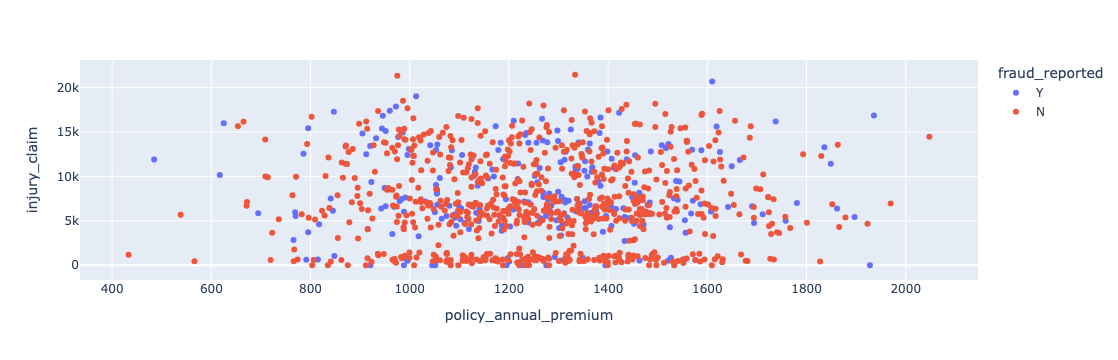

In [68]:
fig=px.scatter(insurance_claim,x='policy_annual_premium',y='injury_claim',color='fraud_reported')
fig.show()

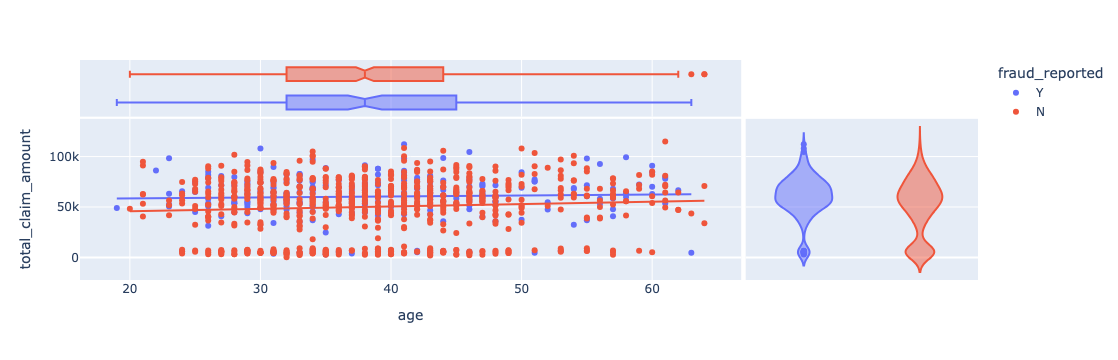

In [70]:
fig=px.scatter(insurance_claim,x='age',y='total_claim_amount',color='fraud_reported',marginal_x='box',marginal_y='violin',trendline='ols')
fig.show()


In [72]:
groupdf_is=insurance_claim.groupby(by=['insured_sex','fraud_reported']).count()
groupdf_is.reset_index(inplace=True)
groupdf_is=groupdf_is[['insured_sex','fraud_reported','count']]
groupdf_is.head()

insured_sex fraud_reported  count
0      FEMALE              N    411
1      FEMALE              Y    126
2        MALE              N    341
3        MALE              Y    121

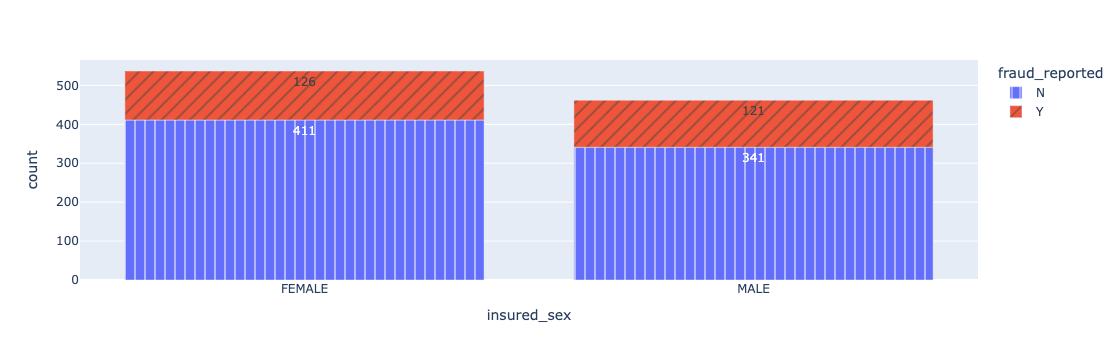

In [74]:
fig=px.bar(groupdf_is,x='insured_sex',y='count',color='fraud_reported',text='count',pattern_shape_sequence=['|','/'],pattern_shape='fraud_reported')
fig.show()

In [76]:
groupdf_uu=insurance_claim.groupby(by=['umbrella_limit','fraud_reported']).count()
groupdf_uu.reset_index(inplace=True)
groupdf_uu=groupdf_uu[['umbrella_limit','fraud_reported','count']]
groupdf_uu.head(3)

umbrella_limit fraud_reported  count
0               0              N    611
1               0              Y    187
2         2000000              N      1

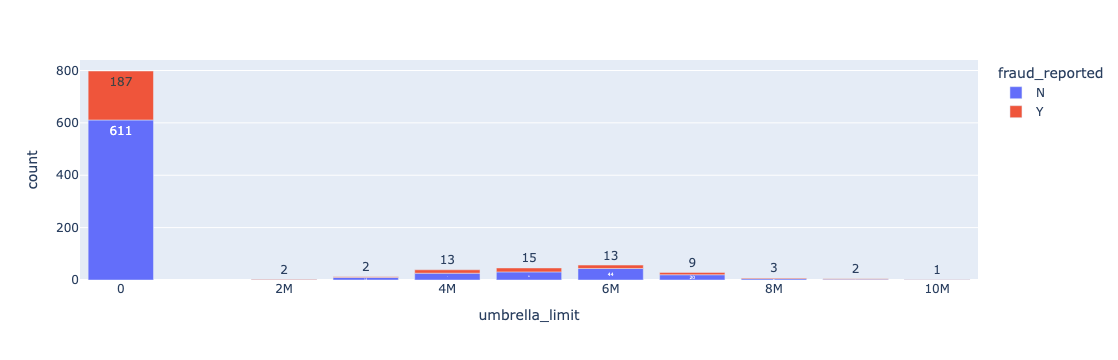

In [78]:
fig=px.bar(groupdf_uu,x='umbrella_limit',y='count',color='fraud_reported',text='count')
fig.show()

In [80]:
groupdf_el=insurance_claim.groupby(by=['insured_education_level','fraud_reported']).count()
groupdf_el.reset_index(inplace=True)
groupdf_el=groupdf_el[['insured_education_level','fraud_reported','count']]
groupdf_el.head()

insured_education_level fraud_reported  count
0               Associate              N    110
1               Associate              Y     34
2                 College              N     90
3                 College              Y     32
4             High School              N    124

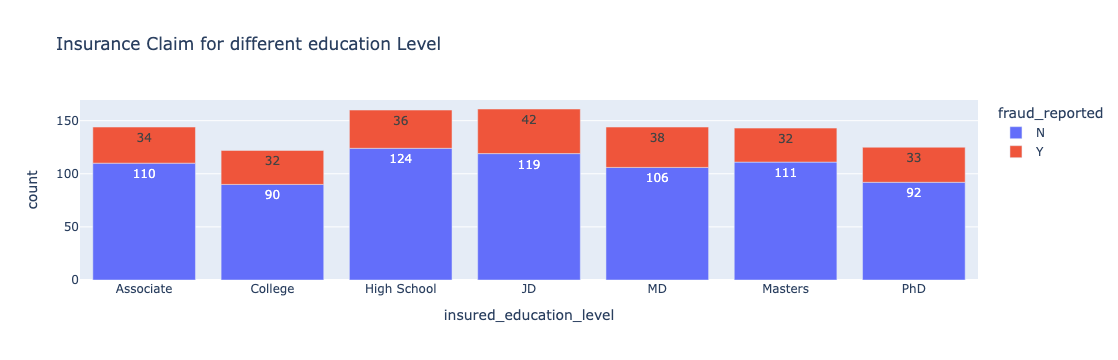

In [82]:
fig=px.bar(groupdf_el,x='insured_education_level',y='count',color='fraud_reported',text='count',title="Insurance Claim for different education Level")
fig.show()

In [84]:
groupdf_ic=insurance_claim.groupby(by=['insured_occupation','fraud_reported']).count()
groupdf_ic.reset_index(inplace=True)
groupdf_ic=groupdf_ic[['insured_occupation','fraud_reported','count']]
groupdf_ic.head()

insured_occupation fraud_reported  count
0       adm-clerical              N     54
1       adm-clerical              Y     11
2       armed-forces              N     52
3       armed-forces              Y     17
4       craft-repair              N     52

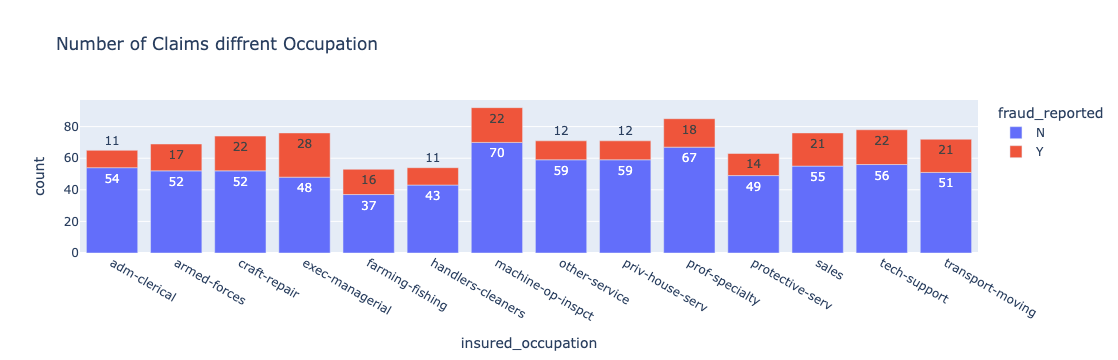

In [86]:
fig=px.bar(groupdf_ic,x='insured_occupation',y='count',color='fraud_reported',text='count',title='Number of Claims diffrent Occupation')
fig.show()

In [88]:
groupdf_h=insurance_claim.groupby(by=['insured_hobbies','fraud_reported']).count()
groupdf_h.reset_index(inplace=True)
groupdf_h=groupdf_h[['insured_hobbies','fraud_reported','count']]
groupdf_h.head()

insured_hobbies fraud_reported  count
0    base-jumping              N     36
1    base-jumping              Y     13
2      basketball              N     28
3      basketball              Y      6
4     board-games              N     34

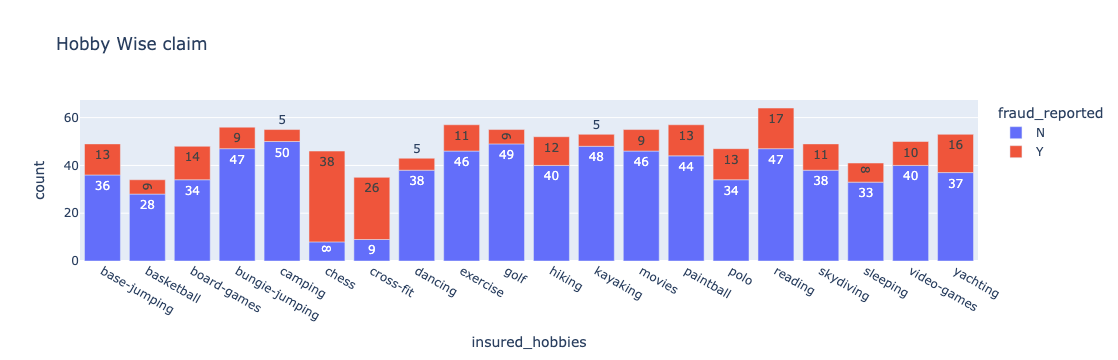

In [90]:
fig=px.bar(groupdf_h,x='insured_hobbies',y='count',color='fraud_reported',text='count',title="Hobby Wise claim")
fig.show()

In [92]:
groupdf_rl=insurance_claim.groupby(by=['insured_relationship','fraud_reported']).count()
groupdf_rl.reset_index(inplace=True)
groupdf_rl=groupdf_rl[['insured_relationship','fraud_reported','count']]
groupdf_rl.head()

insured_relationship fraud_reported  count
0              husband              N    135
1              husband              Y     35
2        not-in-family              N    129
3        not-in-family              Y     45
4       other-relative              N    125

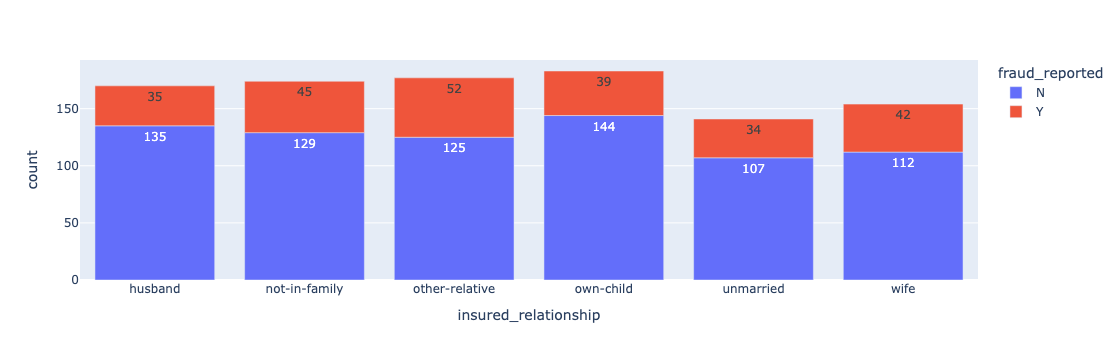

In [94]:
fig=px.bar(groupdf_rl,x='insured_relationship',y='count',color='fraud_reported',text='count')
fig.show()

In [96]:
groupdf_it=insurance_claim.groupby(by=['incident_type','fraud_reported']).count()
groupdf_it.reset_index(inplace=True)
groupdf_it=groupdf_it[['incident_type','fraud_reported','count']]
groupdf_it.head()

incident_type fraud_reported  count
0   Multi-vehicle Collision              N    305
1   Multi-vehicle Collision              Y    114
2                Parked Car              N     76
3                Parked Car              Y      8
4  Single Vehicle Collision              N    285

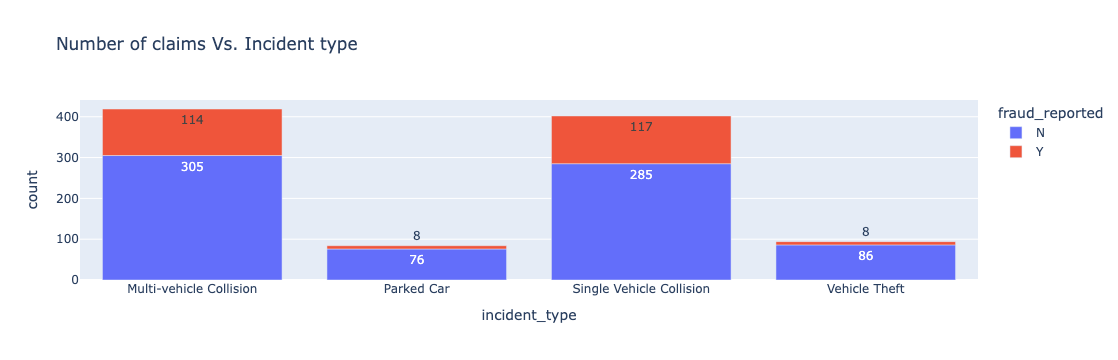

In [98]:
fig=px.bar(groupdf_it,x='incident_type',y='count',color='fraud_reported',text='count',title="Number of claims Vs. Incident type")
fig.show()

In [100]:
groupdf_ct=insurance_claim.groupby(by=['collision_type','fraud_reported']).count()
groupdf_ct.reset_index(inplace=True)
groupdf_ct=groupdf_ct[['collision_type','fraud_reported','count']]
groupdf_ct.head()

collision_type fraud_reported  count
0  Front Collision              N    184
1  Front Collision              Y     70
2   Rear Collision              N    363
3   Rear Collision              Y    107
4   Side Collision              N    205

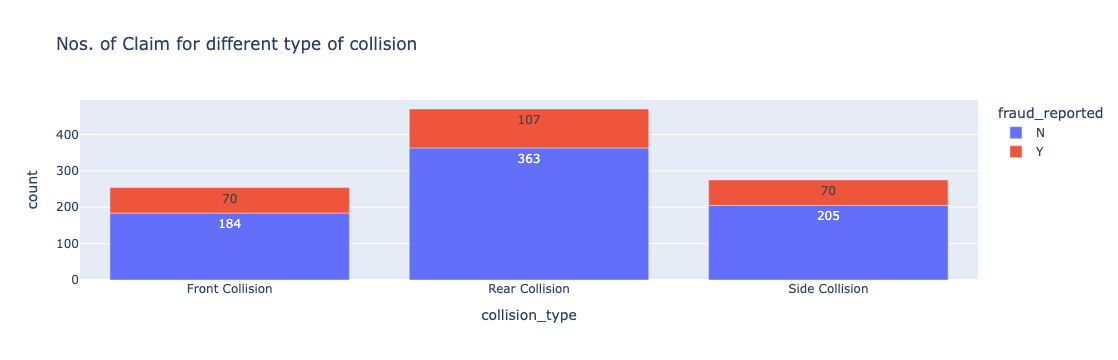

In [102]:
fig=px.bar(groupdf_ct,x='collision_type',y='count',color='fraud_reported',text='count',title="Nos. of Claim for different type of collision")
fig.show()


In [104]:
groupdf_ins=insurance_claim.groupby(by=['incident_severity','fraud_reported']).count()
groupdf_ins.reset_index(inplace=True)
groupdf_ins=groupdf_ins[['incident_severity','fraud_reported','count']]
groupdf_ins.head()

incident_severity fraud_reported  count
0      Major Damage              N    108
1      Major Damage              Y    167
2      Minor Damage              N    316
3      Minor Damage              Y     38
4        Total Loss              N    244

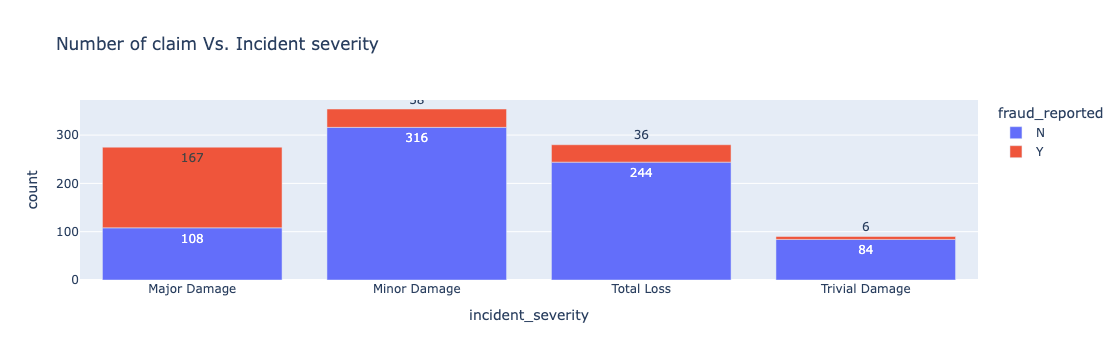

In [106]:
fig=px.bar(groupdf_ins,x='incident_severity',y='count',color='fraud_reported',text='count',title="Number of claim Vs. Incident severity")
fig.show()

In [108]:
groupdf_ac=insurance_claim.groupby(by=['authorities_contacted','fraud_reported']).count()
groupdf_ac.reset_index(inplace=True)
groupdf_ac=groupdf_ac[['authorities_contacted','fraud_reported','count']]
groupdf_ac.head()

authorities_contacted fraud_reported  count
0             Ambulance              N    138
1             Ambulance              Y     57
2                  Fire              N    163
3                  Fire              Y     60
4                 Other              N    135

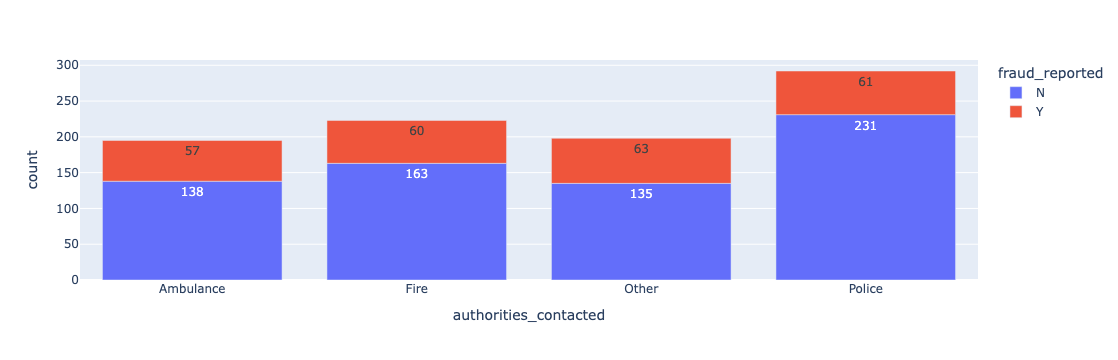

In [110]:
fig=px.bar(groupdf_ac,x='authorities_contacted',y='count',color='fraud_reported',text='count')
fig.show()

In [112]:
groupdf_st=insurance_claim.groupby(by=['incident_state','fraud_reported']).count()
groupdf_st.reset_index(inplace=True)
groupdf_st=groupdf_st[['incident_state','fraud_reported','count']]
groupdf_st.head()

incident_state fraud_reported  count
0             NC              N     75
1             NC              Y     34
2             NY              N    204
3             NY              Y     58
4             OH              N     13

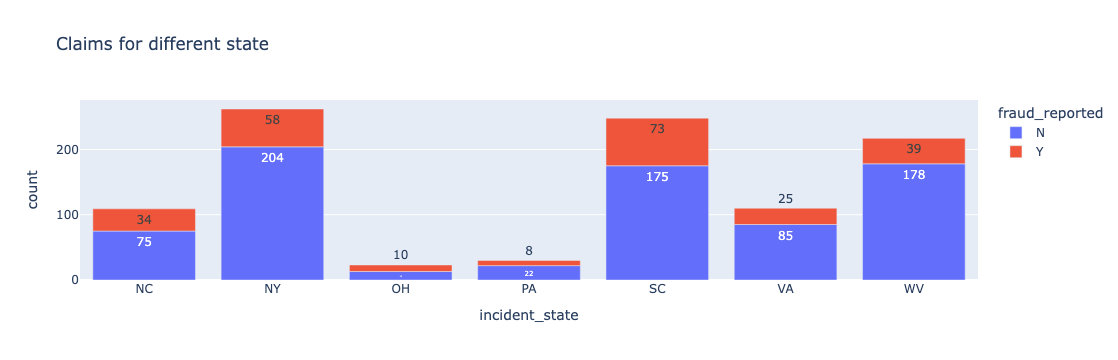

In [114]:
fig=px.bar(groupdf_st,x='incident_state',y='count',color='fraud_reported',text='count',title="Claims for different state")
fig.show()

In [116]:
groupdf_pd=insurance_claim.groupby(by=['property_damage','fraud_reported']).count()
groupdf_pd.reset_index(inplace=True)
groupdf_pd=groupdf_pd[['property_damage','fraud_reported','count']]
groupdf_pd.head()

property_damage fraud_reported  count
0              NO              N    529
1              NO              Y    169
2             YES              N    223
3             YES              Y     78

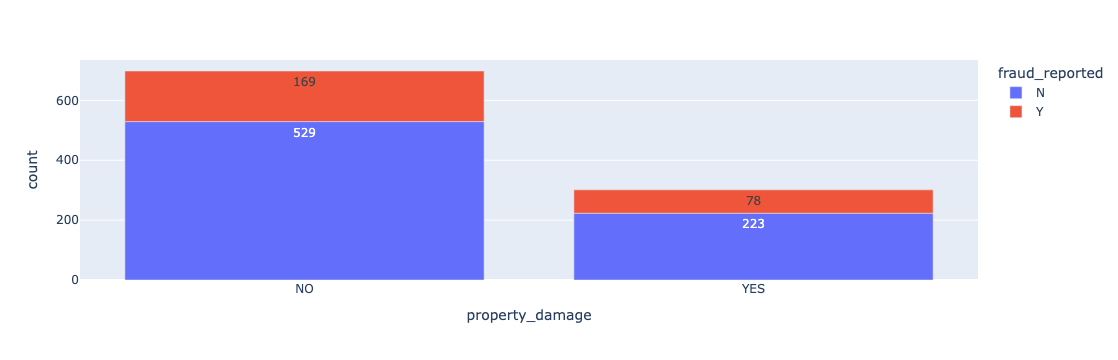

In [118]:
fig=px.bar(groupdf_pd,x='property_damage',y='count',color='fraud_reported',text='count')
fig.show()

In [120]:
groupdf_w=insurance_claim.groupby(by=['witnesses','fraud_reported']).count()
groupdf_w.reset_index(inplace=True)
groupdf_w=groupdf_w[['witnesses','fraud_reported','count']]
groupdf_w.head()

witnesses fraud_reported  count
0          0              N    199
1          0              Y     50
2          1              N    194
3          1              Y     63
4          2              N    176

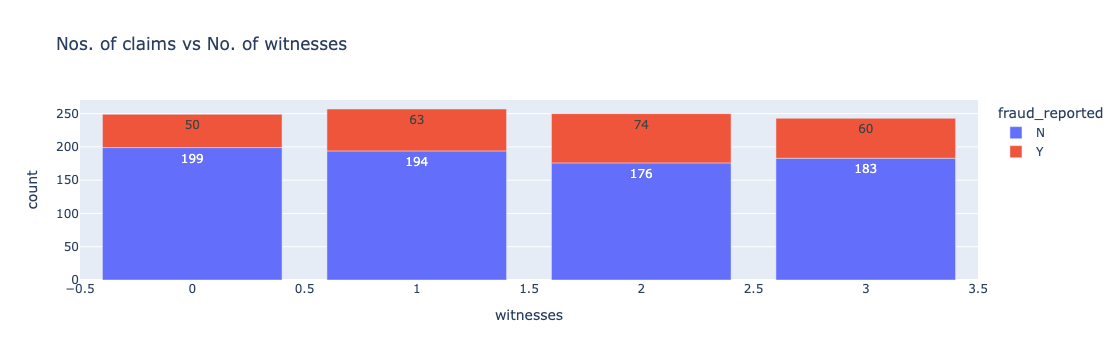

In [122]:
fig=px.bar(groupdf_w,x='witnesses',y='count',color='fraud_reported',text='count',title="Nos. of claims vs No. of witnesses")
fig.show()


In [124]:
groupdf_am=insurance_claim.groupby(by=['auto_make','fraud_reported']).count()
groupdf_am.reset_index(inplace=True)
groupdf_am=groupdf_am[['auto_make','fraud_reported','count']]
groupdf_am.head()

auto_make fraud_reported  count
0    Accura              N     55
1    Accura              Y     13
2      Audi              N     48
3      Audi              Y     21
4       BMW              N     52

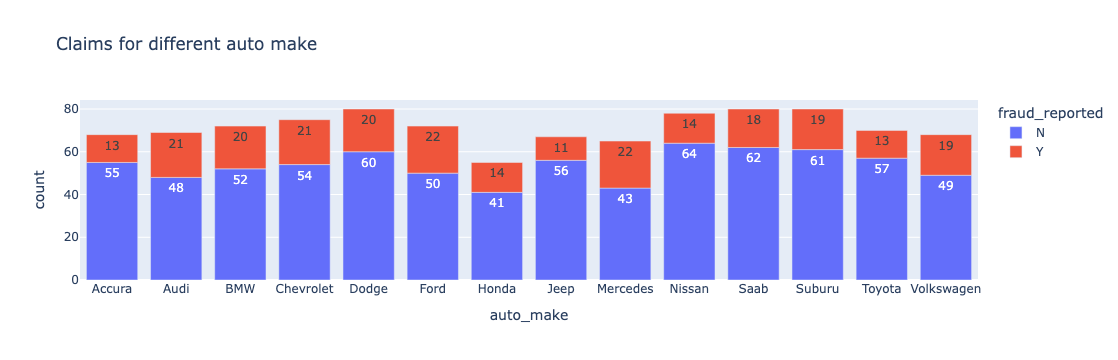

In [126]:
fig=px.bar(groupdf_am,x='auto_make',y='count',color='fraud_reported',text='count',title="Claims for different auto make")
fig.show()

In [128]:
groupdf_atm=insurance_claim.groupby(by=['auto_model','fraud_reported']).count()
groupdf_atm.reset_index(inplace=True)
groupdf_atm=groupdf_atm[['auto_model','fraud_reported','count']]
groupdf_atm.head()

auto_model fraud_reported  count
0   3 Series              N     17
1   3 Series              Y      1
2        92x              N     20
3        92x              Y      8
4         93              N     20

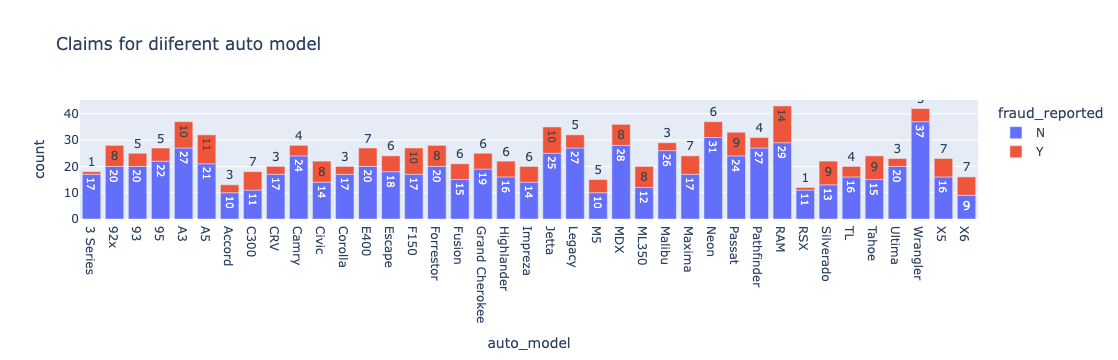

In [130]:
fig=px.bar(groupdf_atm,x='auto_model',y='count',color='fraud_reported',text='count',title="Claims for diiferent auto model")
fig.show()


In [132]:
groupdf_atmm=insurance_claim.groupby(by=['auto_make','auto_model','fraud_reported']).count()
groupdf_atmm.reset_index(inplace=True)
groupdf_atmm=groupdf_atmm[['auto_make','auto_model','fraud_reported','count']]
groupdf_atmm['fraud_reported']=groupdf_atmm['fraud_reported'].apply(lambda x: 'Fraud Reported :YES' if x == 'Y' else 'Fraud Reported :NO')
groupdf_atmm.head()

auto_make auto_model       fraud_reported  count
0    Accura        MDX   Fraud Reported :NO     28
1    Accura        MDX  Fraud Reported :YES      8
2    Accura        RSX   Fraud Reported :NO     11
3    Accura        RSX  Fraud Reported :YES      1
4    Accura         TL   Fraud Reported :NO     16

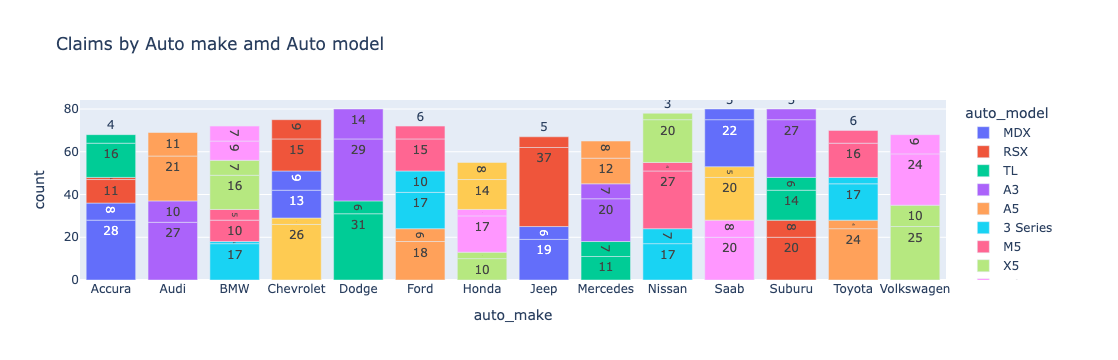

In [134]:
fig=px.bar(groupdf_atmm,x='auto_make',y='count',color='auto_model',text='count',hover_name='fraud_reported',title="Claims by Auto make amd Auto model")
fig.show()

# Naive Bayes Classification for Fraud Detection

In [140]:
# Prepare categorical features and target
categorical_features = [
    'insured_sex', 'insured_education_level', 'insured_occupation',
    'insured_hobbies', 'insured_relationship', 'incident_type',
    'collision_type', 'incident_severity', 'authorities_contacted',
    'incident_state', 'incident_city', 'property_damage',
    'police_report_available', 'auto_make', 'auto_model'
]

# Drop rows with missing or '?' values
df_nb = insurance_claim[categorical_features + ['fraud_reported']].replace('?', pd.NA).dropna()

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

df_encoded = df_nb.copy()
for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [142]:
# Encode target
if df_encoded['fraud_reported'].dtype == 'object':
    df_encoded['fraud_reported'] = df_encoded['fraud_reported'].map({'Y': 1, 'N': 0})

# Split the data
from sklearn.model_selection import train_test_split
X = df_encoded[categorical_features]
y = df_encoded['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
from sklearn.naive_bayes import CategoricalNB
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)

CategoricalNB()

In [144]:
# Predict and evaluate
y_pred = nb_model.predict(X_test)
y_probs = nb_model.predict_proba(X_test)[:, 1]

In [150]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       129
           1       0.65      0.62      0.63        53

    accuracy                           0.79       182
   macro avg       0.75      0.74      0.74       182
weighted avg       0.79      0.79      0.79       182



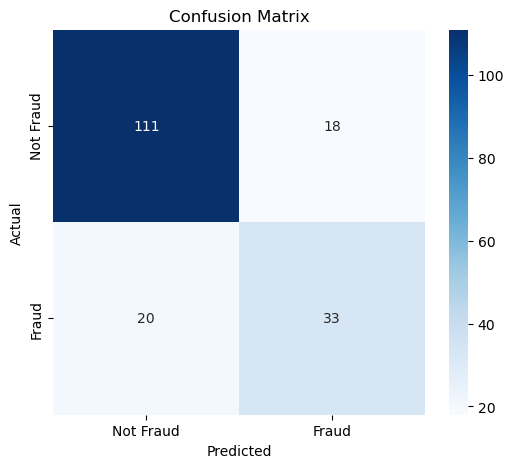

In [152]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

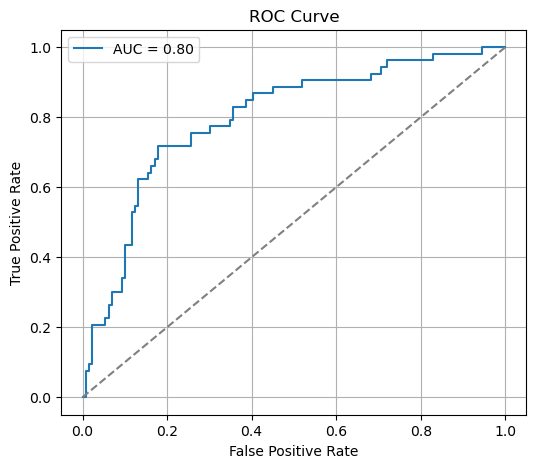

In [154]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [156]:
# Check class balance: fraud vs non-fraud
print("Class distribution (0 = Not Fraud, 1 = Fraud):")
print(y.value_counts(normalize=True))

Class distribution (0 = Not Fraud, 1 = Fraud):
fraud_reported
0    0.734581
1    0.265419
Name: proportion, dtype: float64


In [162]:
# Evaluate model performance using 5-fold cross-validation
cv_scores = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validated accuracy scores: [0.80769231 0.75274725 0.81318681 0.81767956 0.80110497]
Mean accuracy: 0.7984821808026228


In [164]:
# Estimate the probability of fraud given each level of a selected feature
feature_name = 'incident_severity'
levels = df_encoded[feature_name].unique()

for level in levels:
    idx = df_encoded[feature_name] == level
    prob = df_encoded.loc[idx, 'fraud_reported'].mean()
    print(f"P(fraud | {feature_name} = {level}) = {prob:.2f}")


P(fraud | incident_severity = 0) = 0.61
P(fraud | incident_severity = 1) = 0.11
P(fraud | incident_severity = 2) = 0.13
P(fraud | incident_severity = 3) = 0.08


In [166]:
# Analyze misclassified examples: false positives and false negatives
X_test_eval = X_test.copy()
X_test_eval['true'] = y_test.values
X_test_eval['pred'] = y_pred

false_negatives = X_test_eval[(X_test_eval['true'] == 1) & (X_test_eval['pred'] == 0)]
false_positives = X_test_eval[(X_test_eval['true'] == 0) & (X_test_eval['pred'] == 1)]

print(f"False Negatives (missed frauds): {len(false_negatives)}")
print(f"False Positives (mistaken frauds): {len(false_positives)}")

False Negatives (missed frauds): 20
False Positives (mistaken frauds): 18
